# Optimization for Logistic Regression
Source Code: [logistic-regression.py](https://github.com/KatieMacalintal/KatieMacalintal.github.io/blob/main/posts/optimization/logistic_regression.py)

## Implementation


## Experiments and Findings


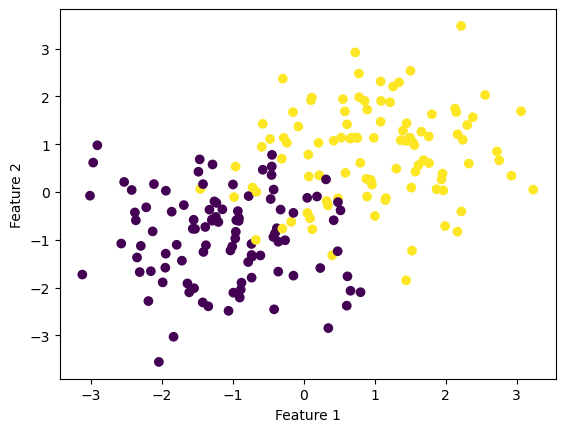

In [1]:
from logistic_regression import LogisticRegression # source code
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [2]:
# fit the model

LR = LogisticRegression()
LR.fit(X, y, alpha = 0.1, max_epochs = 1000)

# inspect the fitted value of w
LR.w 

array([2.07752228, 1.71852309, 0.51754512])

last loss: 0.2012042067784903


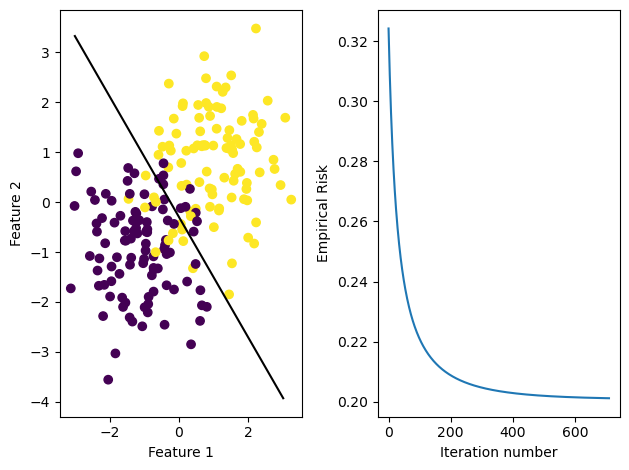

In [3]:
fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (- LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()

#print("score history:", LR.score_history)
print("last loss:", LR.loss_history[-1])

#try getting gradient under 0.15

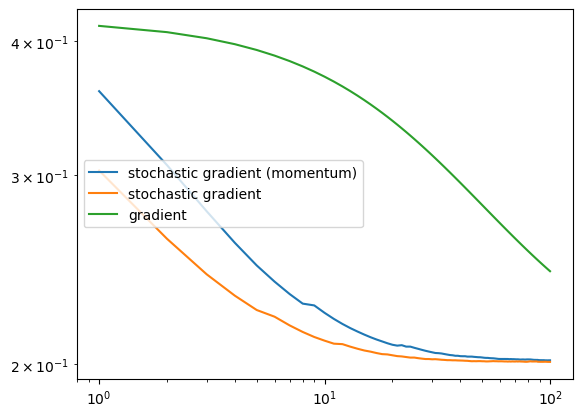

In [4]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = True, 
                  batch_size = 10, 
                  alpha = .05) 

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (momentum)")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .1)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 100)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 
